In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sys
sys.path.append('/home/tomek/ib_tools')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.DataFrame({'x': np.linspace(-4, 4, 1000)})

In [50]:
def reducer(x):
    if x < -2.7:
        return max(-(np.log(np.abs(x) -2.7) - .5), 0)
    elif x > 2.7:
        return min((np.log(np.abs(x) -2.7) - .5), 0)
    else:
        return - x**3

In [51]:
#%%timeit
d1 = pd.DataFrame(data.x)
d1['r'] = d1.x.apply(reducer)
out = d1.set_index('x')

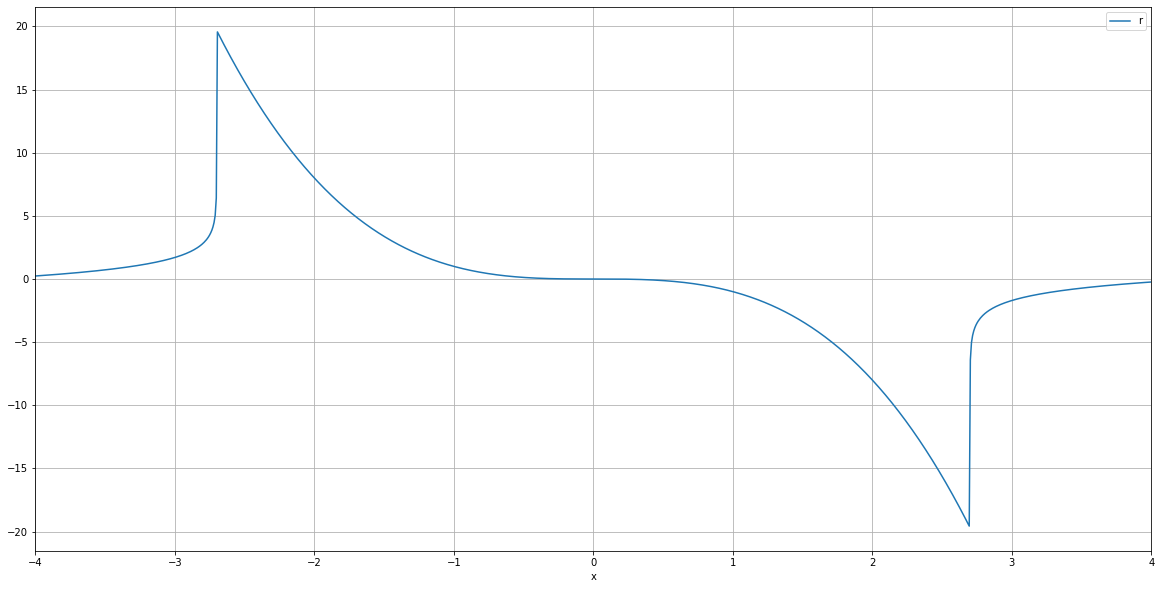

In [52]:
out.plot(figsize=(20,10), grid=True);

In [7]:
#%%timeit
d = pd.DataFrame(data.x)
d['x3'] = -data.x ** 3
d['log'] = (np.log(np.abs(d.x) -2) - .5)
d['-log'] = -(np.log(np.abs(d.x) -2) - .5)
a = d[d['x'] > 2].set_index('x')['log']
b = (d[(d['x']> -2)][d['x'] < 2]).set_index('x')['x3']
c = d[d['x']< -2].set_index('x')['-log']
output = pd.concat([a,b,c]).sort_index()

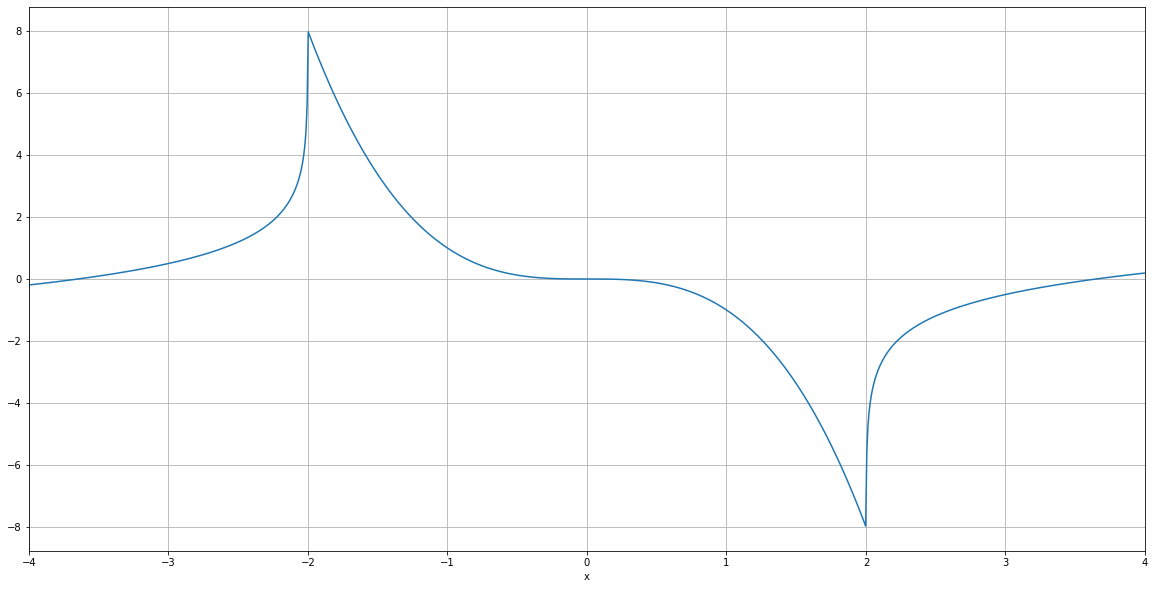

In [8]:
output.plot(figsize=(20,10), grid=True);